In [1]:
import numpy as np

In [7]:
def ferm(x):
  return 1/(np.exp(-x) + 1)

class LogisticRegression():

  def __init__(self, lr = 0.001 , n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None


  def fit(self , X ,Y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in range(self.n_iters):
      linear_predictions = np.dot(X , self.weights) + self.bias

      predictions = ferm(linear_predictions)

      dw = (1/n_samples) * np.dot(X.T , (predictions - Y))
      db = (1/n_samples) * np.sum(predictions - Y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def prediction(self , X):
    linear_predictions = np.dot(X , self.weights) + self.bias
    y_predicted = ferm(linear_predictions)
    class_predicted = [0 if y <= 0.5 else 1 for y in y_predicted]
    return class_predicted
def percentage(y_test , y_predicted):
  return np.sum(y_test == y_predicted) / len(y_test)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
dat = datasets.load_breast_cancer()
X , y = dat.data , dat.target
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1234)
classify = LogisticRegression(lr = 0.0001 , n_iters = 1000)
classify.fit(X_train , y_train)
ypred = classify.prediction(X_test)

accuracy = percentage(y_test , ypred)
print(accuracy)



0.9298245614035088


In [ ]:
lrs = np.arange(1e-5, 1e-3+1e-5, 1e-5)
n_iters = np.arange(100, 1000, 10)
### colormap code taken from my masters project

X, Y = np.meshgrid(n_iters,lrs)

Temps = np.zeros((len(lrs), len(n_iters)))
for j in range(len(lrs)):
  for i in range(len(n_iters)):
    classify = LogisticRegression(lr = lrs[j] , n_iters = n_iters[i])
    classify.fit(X_train , y_train)
    ypred = classify.prediction(X_test)
    Temps[j][i] = percentage(y_test , ypred)






<ipython-input-7-cfe2ee1c9be2>:2: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(-x) + 1)


In [44]:
print(len(lrs))
print(len(n_iters))

100
90


In [39]:
import numpy as np
import matplotlib.pyplot as pyplot
import cmath

import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.wigner import wigner_3j
import scipy.linalg as lg
import numpy.linalg
import random
import cmath
import scipy.constants as sc
print(sc.hbar)
import timeit
from scipy.optimize import curve_fit
import math

1.0545718176461565e-34


Text(0.5, 1.0, 'breast cancer classifier')

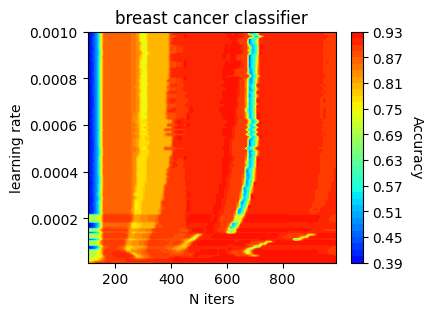

In [51]:

colorinterpolation = 50
colorMap = pyplot.cm.jet#

fig = pyplot.figure(figsize= (4,3))
pyplot.contourf(n_iters,lrs,Temps, colorinterpolation,cmap = colorMap) #100*X changes it to percentage


pyplot.xlabel('N iters')
pyplot.ylabel("learning rate")
colorbar = pyplot.colorbar()

colorbar.ax.get_yaxis().labelpad = 15
colorbar.ax.set_ylabel('Accuracy', rotation=270)

pyplot.clim(0.3,1)
pyplot.title('breast cancer classifier')